# Taller - Módulo
# Análisis de datos con Python.

## Datos de precios y ventas de aguacates en los Estados Unidos.

Descargar la base de datos de:https://www.kaggle.com/datasets/neuromusic/avocado-prices/data

Descripción de los datos:

- Date (Fecha): La fecha de la observación de los datos.
- AveragePrice (Precio promedio): El precio promedio de un solo aguacate.
- Total Volume (Volumen total): El volumen total de aguacates vendidos.
- 4046, 4225, 4770 (Códigos de producto): Estos códigos representan diferentes categorías de aguacates. Por ejemplo, el código 4046 corresponde a los aguacates de tipo pequeño, etc.
- Total Bags (Bolsas totales): La suma de las bolsas pequeñas, grandes y extra grandes.
- Small Bags, Large Bags, XLarge Bags (Bolsas pequeñas, grandes, extra grandes): Desglose del total de bolsas en diferentes tamaños.
- Type (Tipo): Puede ser "convencional" u "orgánico", indicando el tipo de aguacates.


## Cuestionario

Cargar la base de datos y convertirla en DataFrame. Seguido de ello:

1. Determina si la base de datos contiene celdas vacías o no y si las celdas están en el tipo de dato requerido.
2. Filtra solo aguacates convencionales.
3. Agrupa por tipo y calcula el precio.
4. ¿Cuál es el tipo de aguacte más vendido?
5. ¿Cuál es la región que compra más aguacate? Graficar y comparar las regiones. Discriminar por un color diferente las 3 regiones que más compra aguacates.
8. ¿Cuál es el año con mas ventas? Graficar
9. Analizar si hay patrones en los precios promedio según el día de la semana.
10. ¿Cómo ha cambiado la proporción de ventas de bolsas pequeñas, grandes y extra grandes con el tiempo?

Crear una carpeta que contenga primer nombre y primer apellido de los estudiantes (ej. CamiloPerez_MariaRodriguez) y dentro de ella cargar el archivo EjercicioAvocado.ipynb con las respuestas al cuestionario. Subir la carpeta al drive: https://drive.google.com/drive/folders/18OVwRbn-N6c-55_CFGBBrEOOHoZ5tza0?usp=drive_link

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('Datos/avocado.csv')
df


,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [2]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [4]:
#conteo de valores nulos
df.isnull().value_counts()

Date   AveragePrice  Total Volume  4046   4225   4770   Total Bags  Small Bags  Large Bags  XLarge Bags  type   year   region
False  False         False         False  False  False  False       False       False       False        False  False  False     18249
Name: count, dtype: int64

In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  object        
 11  year          18249 non-null  int64         
 12  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 1.8+ MB


In [6]:
dfconventional = df[df['type'] == "conventional"]
dfconventional

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9121,2018-02-04,0.76,1272039.80,531469.08,368948.26,13078.20,358544.26,127833.03,229786.03,925.20,conventional,2018,WestTexNewMexico
9122,2018-01-28,0.85,957086.16,479147.93,179489.19,7314.98,291134.06,143430.96,147376.43,326.67,conventional,2018,WestTexNewMexico
9123,2018-01-21,0.84,1020913.20,505263.29,177911.40,9468.95,328269.56,118978.50,209131.06,160.00,conventional,2018,WestTexNewMexico
9124,2018-01-14,0.90,950954.60,463945.73,188126.02,11227.47,287655.38,125408.69,162040.02,206.67,conventional,2018,WestTexNewMexico


In [7]:
#agrupacion
df_type = df.groupby('type').sum('Total Volume')

#resetear el indice
df_type = df_type.reset_index()

Eliminarcolumnas = ['4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year']
df_type = df_type.drop(columns=Eliminarcolumnas)

# Imprimir el DataFrame resultante
print(df_type)

           type  AveragePrice  Total Volume
0  conventional      10568.27  1.508722e+10
1       organic      15089.43  4.361817e+08


In [8]:
#agrupacion
df_region = df.groupby('region').sum('Total Volume')

#resetear el indice
df_region = df_region.reset_index()

Eliminarcolumnas = ['AveragePrice','4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year']
df_region = df_region.drop(columns=Eliminarcolumnas)

df_region = df_region.drop(51)

# Imprimir el DataFrame resultante
print(df_region)


                 region  Total Volume
0                Albany  1.606780e+07
1               Atlanta  8.860512e+07
2   BaltimoreWashington  1.347139e+08
3                 Boise  1.441319e+07
4                Boston  9.727398e+07
5      BuffaloRochester  2.296247e+07
6            California  1.028982e+09
7             Charlotte  3.555554e+07
8               Chicago  1.337023e+08
9      CincinnatiDayton  4.452201e+07
10             Columbus  2.999336e+07
11        DallasFtWorth  2.084193e+08
12               Denver  1.389025e+08
13              Detroit  6.342242e+07
14          GrandRapids  3.021174e+07
15           GreatLakes  5.896425e+08
16   HarrisburgScranton  4.180886e+07
17  HartfordSpringfield  5.067054e+07
18              Houston  2.031679e+08
19         Indianapolis  3.026339e+07
20         Jacksonville  2.879000e+07
21             LasVegas  5.437691e+07
22           LosAngeles  5.078965e+08
23           Louisville  1.609700e+07
24    MiamiFtLauderdale  9.767322e+07
25          

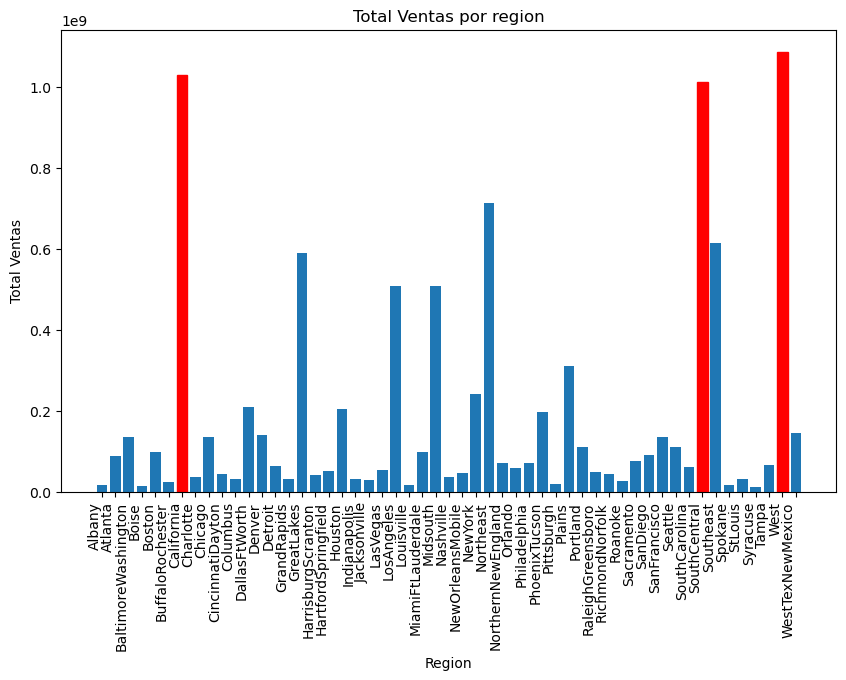

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
# Crear la gráfica de barras
g1 = plt.bar(df_region['region'], df_region['Total Volume'])

# Personalizar la gráfica
plt.xlabel('Region')
plt.ylabel('Total Ventas')
plt.title('Total Ventas por region')


g1[51].set_color('r')
g1[45].set_color('r')
g1[6].set_color('r')
plt.xticks(rotation=90, ha='right')

# Mostrar la gráfica
plt.show()

In [10]:
#agrupacion
df_date = df.groupby('year').sum('Total Volume')

#resetear el indice
df_date = df_date.reset_index()

Eliminarcolumnas = ['AveragePrice','4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']
df_date = df_date.drop(columns=Eliminarcolumnas)


# Imprimir el DataFrame resultante
print(df_date)


   year  Total Volume
0  2015  4.385469e+09
1  2016  4.820890e+09
2  2017  4.934306e+09
3  2018  1.382738e+09


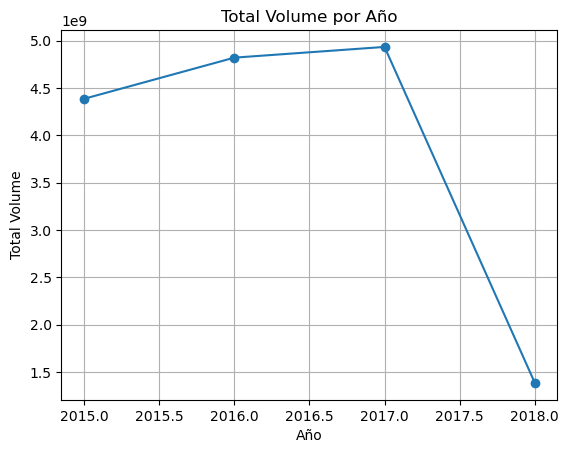

In [11]:
# Graficar con líneas
plt.plot(df_date['year'], df_date['Total Volume'], 'o-')
plt.xlabel('Año')
plt.ylabel('Total Volume')
plt.title('Total Volume por Año')
plt.grid(True)
plt.show()

In [12]:
df['DiaSemana'] = df['Date'].dt.dayofweek

#agrupacion

df_semana = df.groupby('DiaSemana').sum('Total Volume')

#resetear el indice
df_semana = df_semana.reset_index()

Eliminarcolumnas = ['Total Volume','year','4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']
df_semana = df_semana.drop(columns=Eliminarcolumnas)


# Imprimir el DataFrame resultante
print(df_semana)


   DiaSemana  AveragePrice
0          6       25657.7


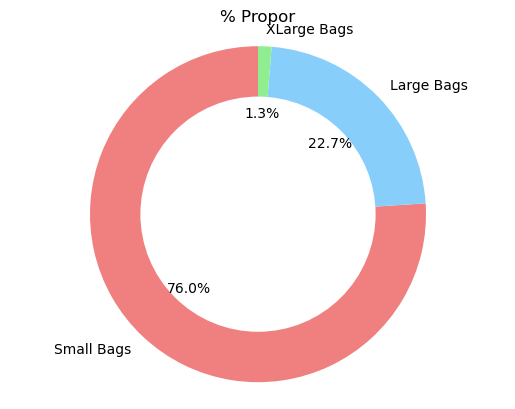

In [23]:
SumTotalBags = sum(df['Total Bags'])
SumTotalSmall = sum(df['Small Bags'])
SumTotalLarge = sum(df['Large Bags'])
SumTotalXlarge = sum(df['XLarge Bags'])

Porcsmall = SumTotalSmall / SumTotalBags
Porclarge = SumTotalLarge / SumTotalBags
porcxlarg = SumTotalXlarge / SumTotalBags

labels = ['Small Bags', 'Large Bags', 'XLarge Bags']
sizes = [Porcsmall, Porclarge, porcxlarg]
colors = ['lightcoral', 'lightskyblue', 'lightgreen']

# Crear el gráfico de torta
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Añadir un círculo en el centro para que parezca un donut
centro_circulo = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centro_circulo)

# Ajustes adicionales
plt.axis('equal')  # Asegura que el gráfico de torta sea circular
plt.title('% Propor')

# Mostrar el gráfico
plt.show()

